In [1]:
import vtki
from vtki import examples
import numpy as np
import vtk

# Overview of `vtki`

This notebook demos the examples present directly in the `vtki` package and helps new users learn how to get started using `vtki`. 

This notebook is outlined in a manner that builds up an understanding of how `vtki` wraps VTK data objects so that we can show how to use the `vtki` objects then demostrate how those `vtki` objects are plotted.

-----

## Getting Started

Do you have some VTK data objects or VTK data files that you'd like to use in a Pythonic manner? Then go ahead and load your data file with its appriate class! The classes available in `vtki` correspond to VTK classes in the following way:

| `vtki` Class | `vtk` Class |
|--------------|-------------|
|`vtki.PolyData`|`vtk.vtkPolyData`|
|`vtki.StructuredGrid`|`vtk.vtkStructuredGrid`|
|`vtki.UnstructuredGrid`|`vtk.vtkUnstructuredGrid`|
|`vtki.UniformGrid`|`vtk.vtkImageData`|
|`vtki.RectilinearGrid`|`vtk.vtkRectilinearGrid`|

If you want to load a data file, then go ahead and use `vtki`'s `read` method to read your file. This function will handle figuing out what kind of data file you have and return the appropriate `vtki` object for you:

```py
import vtki
filename = 'myfile.vtk'
data = vtki.read(filename)
```

We already have some VTK files under the examples directory so how about we grab that filename and demo this!

In [2]:
filename = examples.uniformfile
data = vtki.read(filename)
type(data)

vtki.grid.UniformGrid

Awesome! Now we have a `UniformGrid` ready to use (this is essentially just a wrapped `vtkImageData` object, so you could still pass this on to VTK algorithms.

*So why do I want a `vtki` wrapped object?* **First**, these allow you to access attributes of the VTK data object in a more Pythonic manner. For example:

In [3]:
data.number_of_cells

729

In [4]:
data.number_of_points

1000

In [5]:
data.number_of_scalars

2

In [6]:
data.points

array([[1., 1., 1.],
       [1., 1., 2.],
       [1., 1., 3.],
       ...,
       [9., 9., 7.],
       [9., 9., 8.],
       [9., 9., 9.]])

**Second**, `vtki` has HTML representation for the VTK data objects that will give you a whole lot more insight into the data object that VTK's typicall printing of the class name and memory address:

In [7]:
data

(UniformGrid)0x1223f20a8

**And third**, `vtki` has functions to handle plotting these objects right out of the box. You can simply call the `plot()` method on any `vtki` object and a rendering will be produced for you!
You can also pass the scalar name that you'd like to view and `vtki` will handle coloring your dataset by that array:

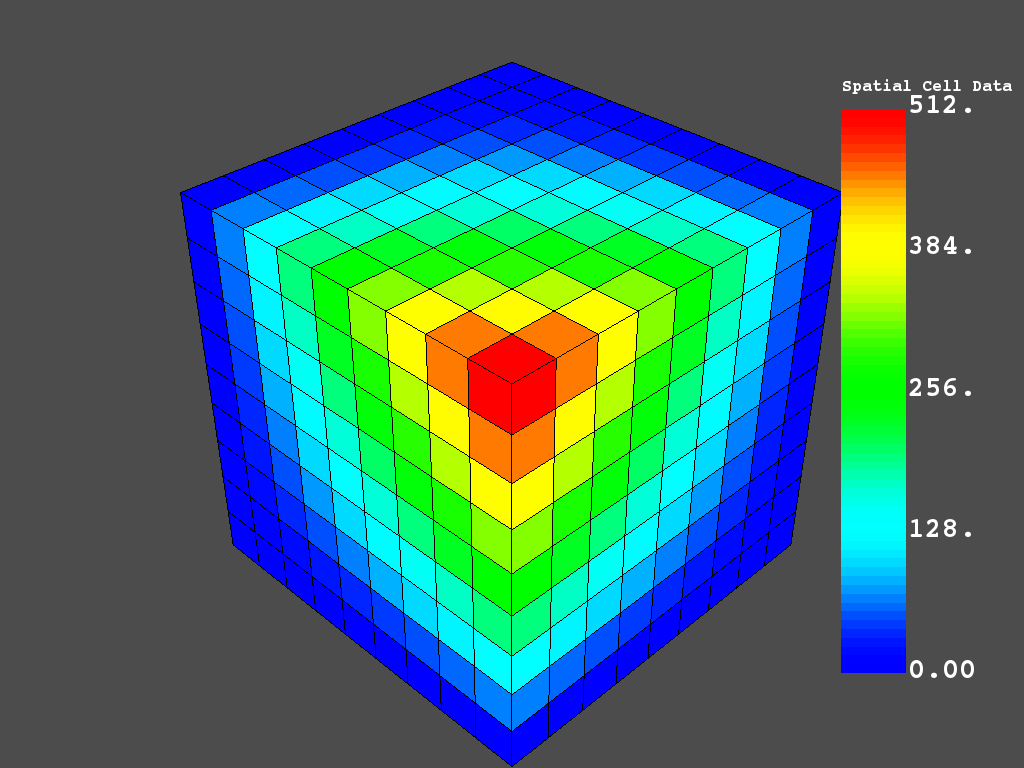

In [8]:
data.plot(scalars='Spatial Cell Data')

-----

## Creating new VTK objects on the fly

Here is a demo on how to quickly create new VTK data objects using `vtki`

### vtkPolyData

In [9]:
x = np.random.uniform(0, 10, 100)
y = np.random.uniform(0, 10, 100)
z = np.random.uniform(0, 10, 100)

mesh = vtki.PolyData(np.c_[x,y,z])
mesh

Attribute,Values
N Cells,100
N Points,100
X Bounds,"(0.0937089756484033, 9.858117672577528)"
Y Bounds,"(0.12165264106660634, 9.826113967672828)"
Z Bounds,"(0.012178665167164038, 9.926078828764965)"


### vtkStructuredGrid

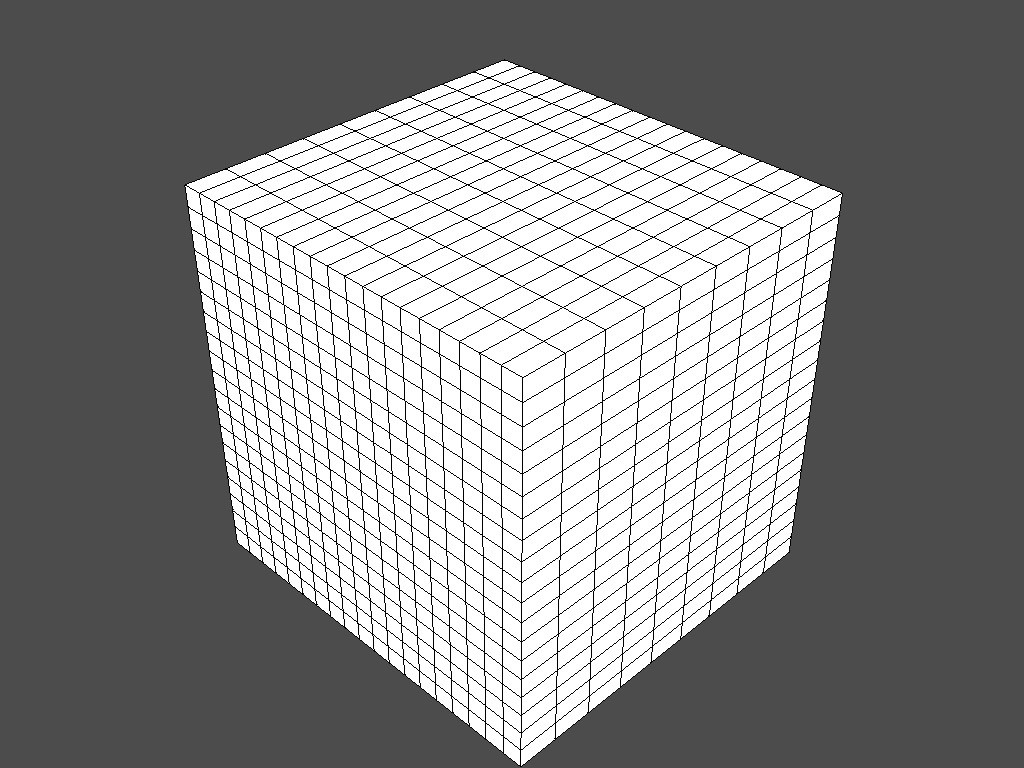

In [10]:
xrng = np.arange(-10, 10, 2)
yrng = np.arange(-10, 10, 1)
zrng = np.arange(-10, 10, 0.5)
x, y, z = np.meshgrid(xrng, yrng, zrng)
grid = vtki.StructuredGrid(x, y, z)
grid.plot()

### vtkUnstructuredGrid

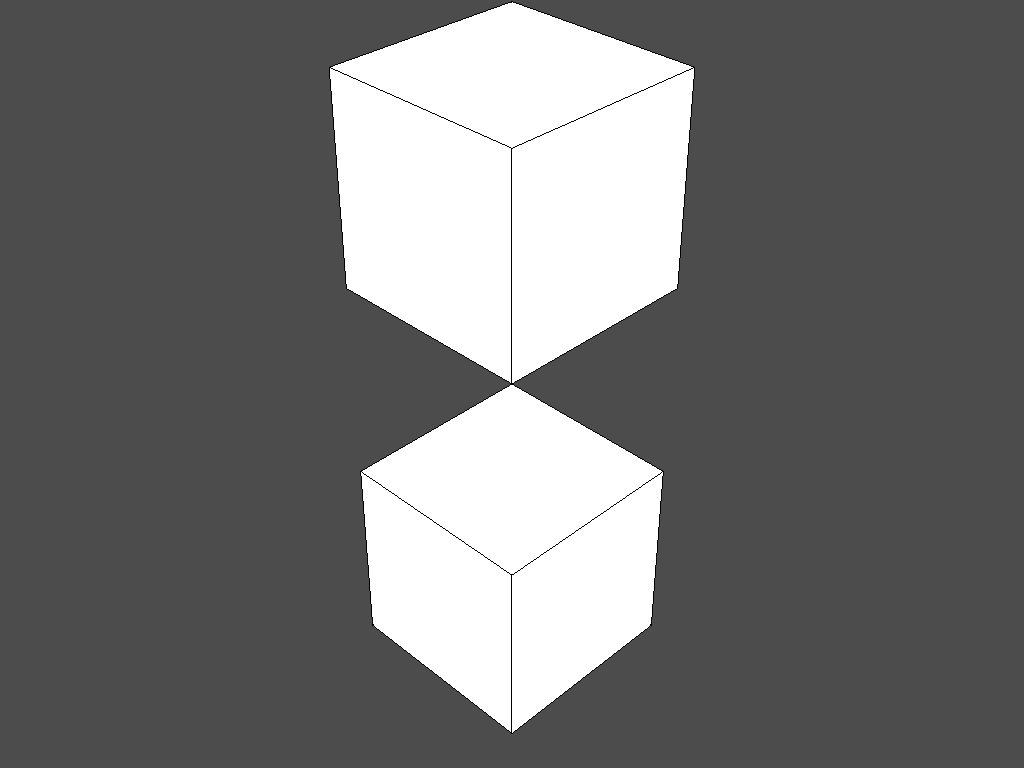

In [11]:
offset = np.array([0, 9])
cells = np.array([8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11, 12, 13, 14, 15])
cell_type = np.array([vtk.VTK_HEXAHEDRON, vtk.VTK_HEXAHEDRON], np.int8)

cell1 = np.array([[0, 0, 0],
                  [1, 0, 0],
                  [1, 1, 0],
                  [0, 1, 0],
                  [0, 0, 1],
                  [1, 0, 1],
                  [1, 1, 1],
                  [0, 1, 1]])

cell2 = np.array([[0, 0, 2],
                  [1, 0, 2],
                  [1, 1, 2],
                  [0, 1, 2],
                  [0, 0, 3],
                  [1, 0, 3],
                  [1, 1, 3],
                  [0, 1, 3]])

points = np.vstack((cell1, cell2))

grid = vtki.UnstructuredGrid(offset, cells, cell_type, points)
grid.plot()

### vtkImageData

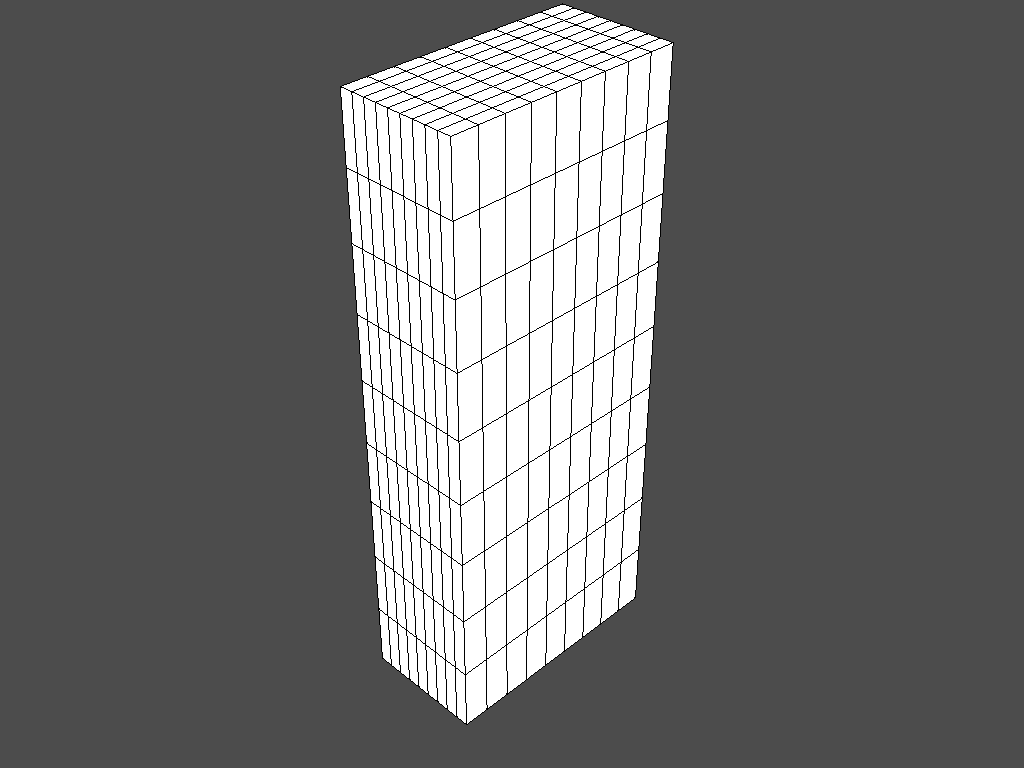

In [12]:
dims = (10, 10, 10)
grid = vtki.UniformGrid(dims) # Using default spacing and origin
spacing = (2, 1, 5)
grid = vtki.UniformGrid(dims, spacing) # Usign default origin
origin = (10, 35, 50)
grid = vtki.UniformGrid(dims, spacing, origin) # Everything is specified
grid.plot()

### vtkRectilinearGrid

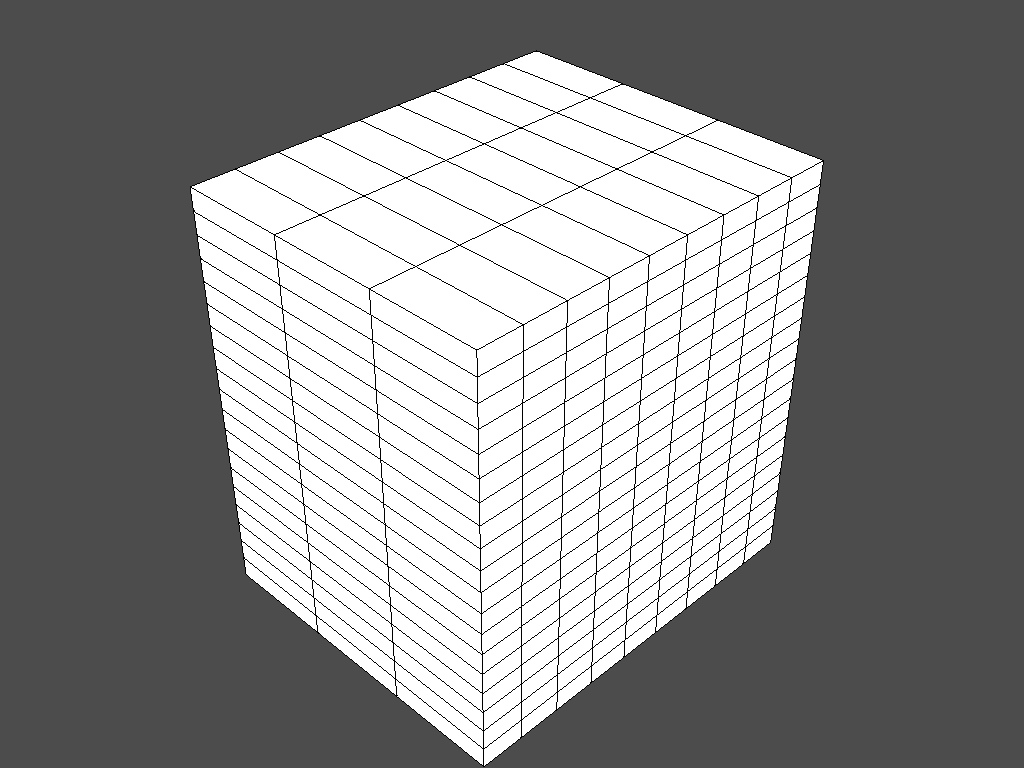

In [13]:
xrng = np.arange(-10, 10, 2)
yrng = np.arange(-10, 10, 5)
zrng = np.arange(-10, 10, 1)
grid = vtki.RectilinearGrid(xrng, yrng, zrng)
grid.plot()